In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os

In [32]:
#Lectures d'image (load dataset)
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(folder,filename)),cv2.COLOR_BGR2RGB),(100,100))
        if img is not None:
            images.append(img)
    return np.array(images)

images=load_images_from_folder('Desktop\datatest\Train\pass')
image=load_images_from_folder('Desktop/datatest/Train/fail')

In [65]:
train_dir= "Desktop\datatest\Train"
test_dir= "Desktop/datatest/test"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
vals_generator = test_datagen.flow_from_directory(test_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')


Found 50 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [66]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
# model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 64)        

In [80]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)
hist = model.fit_generator(test_generator, epochs=20, validation_data=val_generator, validation_steps=50)

C:\Users\dell\AppData\Local\Temp\ipykernel_28724\1338981200.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)


Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 0.7034 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 2s 590ms/step - loss: 0.6941 - accuracy: 0.5200
Epoch 3/20
3/3 [==============================] - 2s 829ms/step - loss: 0.6962 - accuracy: 0.5400
Epoch 4/20
3/3 [==============================] - 2s 889ms/step - loss: 0.6920 - accuracy: 0.4400
Epoch 5/20
3/3 [==============================] - 2s 651ms/step - loss: 0.6945 - accuracy: 0.4800
Epoch 6/20
3/3 [==============================] - 2s 662ms/step - loss: 0.7018 - accuracy: 0.4400
Epoch 7/20
3/3 [==============================] - 2s 581ms/step - loss: 0.6849 - accuracy: 0.5600
Epoch 8/20
3/3 [==============================] - 2s 597ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 9/20
3/3 [==============================] - 2s 502ms/step - loss: 0.6947 - accuracy: 0.5400
Epoch 10/20
3/3 [==============================] - 2s 498ms/step - loss: 0.6838

C:\Users\dell\AppData\Local\Temp\ipykernel_28724\1338981200.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(test_generator, epochs=20, validation_data=val_generator, validation_steps=50)


3/3 [==============================] - 2s 787ms/step - loss: 0.7065 - accuracy: 0.3600 - val_loss: 0.7014 - val_accuracy: 0.4167
Epoch 2/20
3/3 [==============================] - 1s 171ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 186ms/step - loss: 0.6940 - accuracy: 0.5400
Epoch 4/20
3/3 [==============================] - 1s 166ms/step - loss: 0.6937 - accuracy: 0.4800
Epoch 5/20
3/3 [==============================] - 1s 167ms/step - loss: 0.6982 - accuracy: 0.4800
Epoch 6/20
3/3 [==============================] - 1s 129ms/step - loss: 0.6881 - accuracy: 0.6400
Epoch 7/20
3/3 [==============================] - 1s 173ms/step - loss: 0.6900 - accuracy: 0.5600
Epoch 8/20
3/3 [==============================] - 0s 145ms/step - loss: 0.6912 - accuracy: 0.6000
Epoch 9/20
3/3 [==============================] - 0s 150ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 10/20
3/3 [==============================] - 0s 117ms/step - loss: 0.6954 - accur

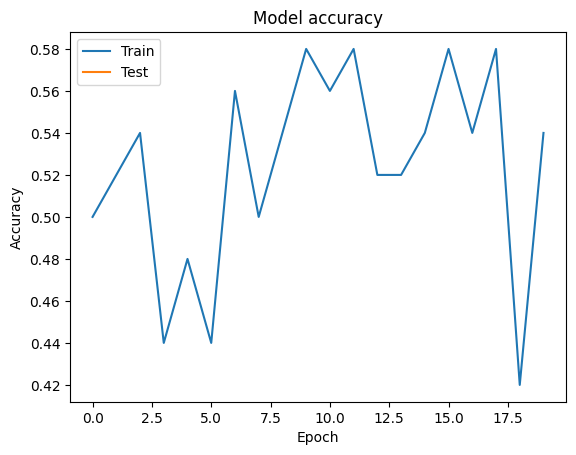

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

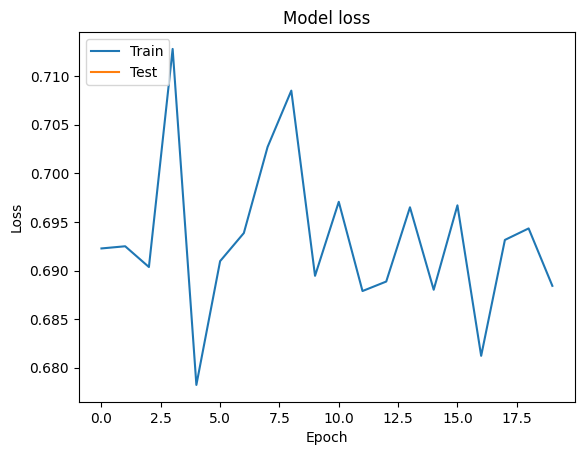

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

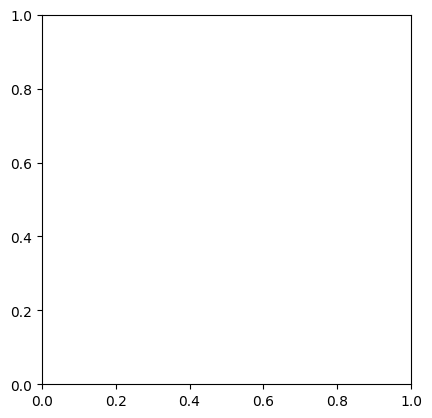

In [64]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def Single_Image_Prediction(file):
#     image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = img_to_array(image)
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image
image = Single_Image_Prediction('Desktop\pass1')
pred_value = model.predict(image)

if pred_value < 0.5:
    print('pass')
else:
    print('fail')